In [9]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

In [10]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)

In [11]:
args['problem'] = 'example_test.smt2'

args['n_tries'] = 10
args['eps'] = 1e-4
args['n_iterations'] = 10000

lines = open(args['problem'], 'r').readlines()
args['lines'] = lines
lines

['(param (A B C) (right-tri A))\n',
 '(define D point (foot A (line B C)))\n',
 '(define I1 point (incenter A B D))\n',
 '(define I2 point (incenter A C D))\n',
 '(define IL line (line I1 I2))\n',
 '(define K point (inter-ll IL (line A B)))\n',
 '(define L point (inter-ll IL (line A C)))\n',
 '(eval (gte (area A B C) (mul 2 (area A K L))))']

Processing instructions...:   0%|          | 0/9 [00:00<?, ?it/s]

INPUT INSTRUCTIONS:
sample (A B C) right-tri (A)
assert (perp (connecting A B) (connecting A C))
define D ((foot A (connecting B C)))
define I1 ((incenter A B D))
define I2 ((incenter A C D))
define IL ((connecting I1 I2))
define K ((inter-ll IL (connecting A B)))
define L ((inter-ll IL (connecting A C)))
eval (gte (area A B C) (mul 2.0 (area A K L)))


Sampling initializations...: 100%|██████████| 10/10 [00:45<00:00,  4.58s/it]


[     0]   0.003680856063 ||   0.100000
======== Print losses ==========
-- Losses --
  perp_(connecting A B)_(connecting A C)             0.0002117947
  points                                             0.0000005134
  distinct                                           0.0034685480
-- Goals --
  gte_(area A B C)_(mul 2.0 (area A K L))            0.0000000000
-- NDGs --


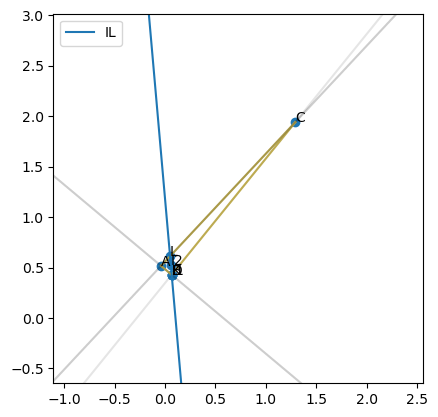

[   100]   0.000345231719 ||   0.096496
[   200]   0.000128537198 ||   0.093115
======== Print losses ==========
-- Losses --
  perp_(connecting A B)_(connecting A C)             0.0000000048
  points                                             0.0000007032
  distinct                                           0.0000991329
-- Goals --
  gte_(area A B C)_(mul 2.0 (area A K L))            0.0000000000
-- NDGs --


Found 1 models


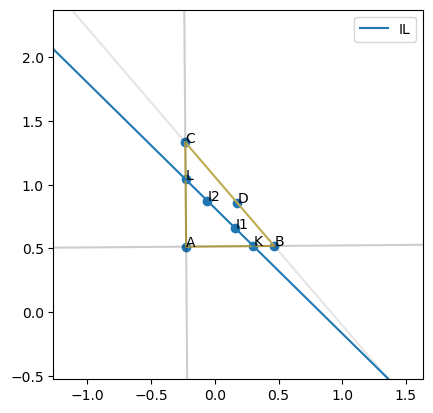

In [12]:
res = build(args)

In [13]:
for item in res[0]:
    print(item)

print('\n##############################################')

for item in res[1][0]:
    print(item)

(param (A B C) (right-tri A))

(define D point (foot A (line B C)))

(define I1 point (incenter A B D))

(define I2 point (incenter A C D))

(define IL line (line I1 I2))

(define K point (inter-ll IL (line A B)))

(define L point (inter-ll IL (line A C)))

(eval (gte (area A B C) (mul 2 (area A K L))))

##############################################
{<primitives.Point object at 0x0000012BBD2AE520>: TfPoint(x=-0.22515558004159203, y=0.5137439681023677), <primitives.Point object at 0x0000012BBD2AEAF0>: TfPoint(x=0.4659048252821274, y=0.5191529758413872), <primitives.Point object at 0x0000012BBD2AE610>: TfPoint(x=-0.23166602162830435, y=1.332698188186903), <primitives.Point object at 0x0000012BBD2AE700>: TfPoint(x=0.17577403602271302, y=0.8575193447936285), <primitives.Point object at 0x0000012BBD2AE6D0>: TfPoint(x=0.16047323774614475, y=0.6581538909847867), <primitives.Point object at 0x0000012BBD175A90>: TfPoint(x=-0.06047955219254531, y=0.87565121481592), <primitives.Point object at 0

In [14]:
for obj_name, obj in res[1][0].named_points.items():
    print(obj_name)
    print(obj)
    (x, y) = obj

for obj_name, obj in res[1][0].named_lines.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
    # slope = y/x, intercept = r

for obj_name, obj in res[1][0].named_circles.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj

A
(coords -0.225156 0.513744)
B
(coords 0.465905 0.519153)
C
(coords -0.231666 1.332698)
D
(coords 0.175774 0.857519)
I1
(coords 0.160473 0.658154)
I2
(coords -0.060480 0.875651)
K
(coords 0.302978 0.517878)
L
(coords -0.229354 1.041885)
IL
LineNF(n=TfPoint(x=0.7015122212129571, y=0.7126574236537939), r=0.581612193773471)
